<a href="https://colab.research.google.com/github/Kashara-Alvin-Ssali/ML-models/blob/main/True_CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler  # Add LearningRateScheduler here

In [50]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define path to Dataset.zip
zip_path = "/content/drive/My Drive/Dataset.zip"

# Extract Dataset.zip
extract_path = "/content/Dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully!


In [51]:
# Image data generator for training, validation, and testing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


# Define data_dir
data_dir = "/content/Dataset/Dataset" # Assuming your dataset is in '/content/Dataset'

train_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'Training'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'Validation'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'Testing'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 62 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [52]:
def lr_schedule(epoch):
  """Learning Rate Schedule

  Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
  Called automatically every epoch as part of callbacks during training.

  # Arguments
      epoch (int): The number of epochs

  # Returns
      lr (float32): learning rate
  """
  lr = 1e-3
  if epoch > 10:
      lr *= 0.5e-3
  elif epoch > 8:
      lr *= 1e-3
  elif epoch > 4:
      lr *= 1e-2
  elif epoch > 2:
      lr *= 1e-1
  print('Learning rate: ', lr)
  return lr

In [53]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True  # Freeze base layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [54]:
# Train model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler  # Import LearningRateScheduler

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Define LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Added compile step

# Assign the output of model.fit to the history variable
# Include lr_scheduler in the callbacks list
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stopping, lr_scheduler])

# Save model
model.save('currency_detector.h5')

Learning rate:  0.001
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.5007 - loss: 0.8598 - val_accuracy: 0.6111 - val_loss: 0.8568 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6520 - loss: 0.5300 - val_accuracy: 0.6667 - val_loss: 0.8051 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6742 - loss: 0.6481 - val_accuracy: 0.5556 - val_loss: 0.8169 - learning_rate: 0.0010
Learning rate:  0.0001
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.7072 - loss: 0.6228 - val_accuracy: 0.5000 - val_loss: 0.8808 - learning_rate: 1.0000e-04
Learning rate:  0.0001
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7655 - loss: 0.5602 - val_accuracy: 0.4444 - val_loss: 1.1014 - learning_rate: 1.0000e-04
Learning rate:  1e-05
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7977 - loss: 0.4582 - val_accuracy: 0.5000 - val_loss: 0.9974

Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.001
Learning rate:  0.0001
Learning rate:  0.0001
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-05
Learning rate:  1e-06
Learning rate:  1e-06
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07
Learning rate:  5e-07


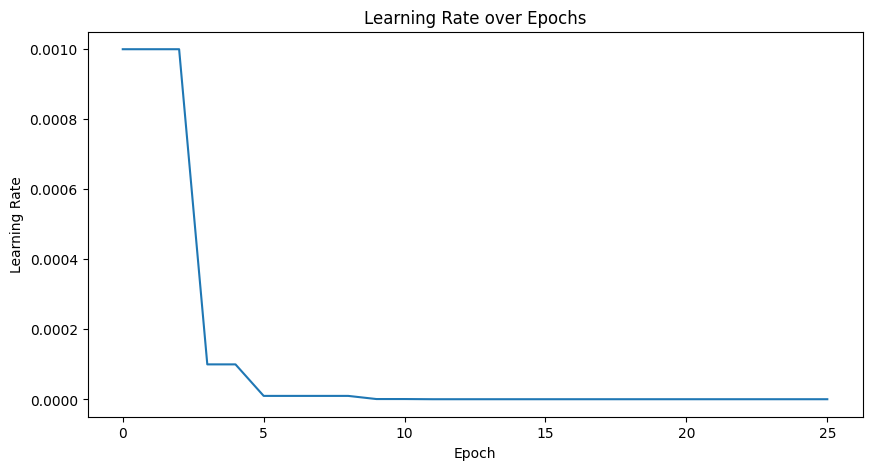

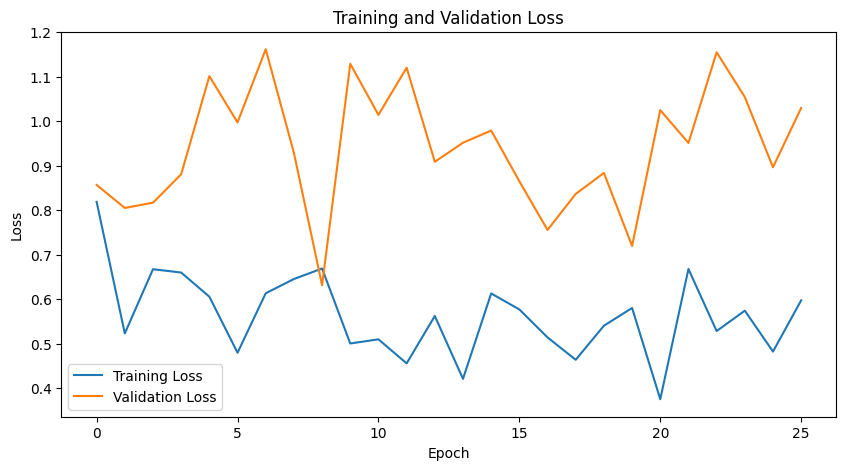

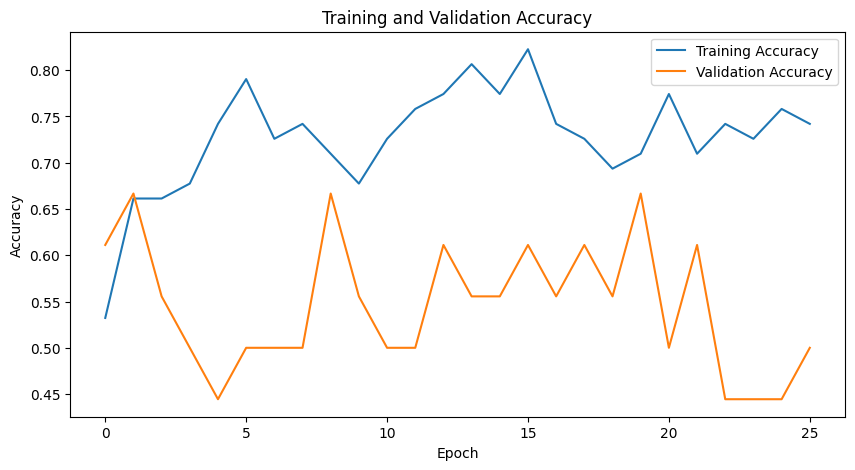

In [55]:
import matplotlib.pyplot as plt

# Get learning rates from lr_scheduler
learning_rates = [lr_schedule(epoch) for epoch in range(len(history.history['loss']))]

# Plot Learning Rate
plt.figure(figsize=(10, 5))
plt.plot(learning_rates)
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Assuming you want to plot validation accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
# Load and test a new image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=[0, -1])
    return img

def predict_currency(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)[0][0]
    return 'Real' if prediction < 0.5 else 'Fake'

# Feature extraction - HSV decomposition
def extract_hsv_features(image_path):
    img = cv2.imread(image_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_img)
    return h, s, v


In [57]:
# Edge detection
def detect_edges(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)
    return edges

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7500 - loss: 0.7368
Test Accuracy: 75.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


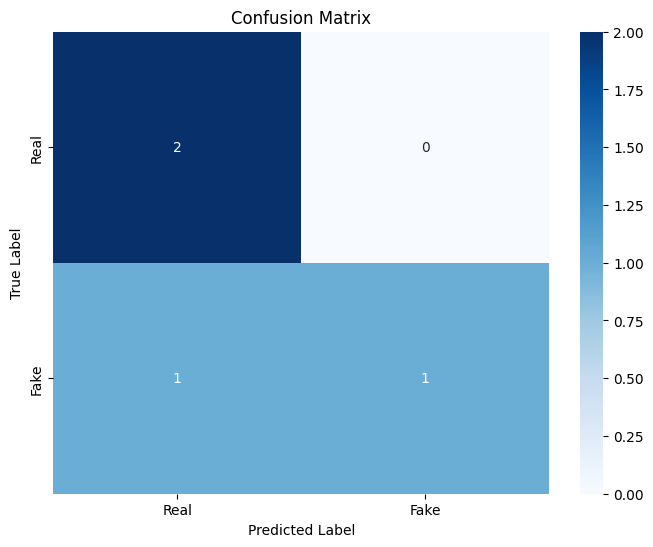

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict classes for the test set
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
y_true = test_generator.classes  # Get true labels

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

# ... (Rest of your code for plotting) ...

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ... (Rest of your code for plotting metrics) ...

In [59]:
import cv2
import numpy as np
import tensorflow as tf
import os

# ... (Your existing code) ...

# Load and test a new image
def preprocess_image(image_path):
    """Preprocesses the image for prediction."""
    # Check if the image file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        raise IOError(f"Failed to load image: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_currency(image_path, model):
    """Predicts the currency class of the image."""
    img = preprocess_image(image_path)
    prediction = model.predict(img)[0][0]
    return 'Real' if prediction < 0.5 else 'Fake'

# Example usage:
image_path = '/content/Dataset/Dataset/Testing/Real/Real.jpg'  # Replace with the path to your image
# Check if the image file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")

prediction = predict_currency(image_path, model)
print(f"Prediction for {image_path}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction for /content/Dataset/Dataset/Testing/Real/Real.jpg: Real
